<a href="https://colab.research.google.com/github/nandu26m/data-analytics-projects/blob/main/airlines_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading and Investigating the data

### 1.1. Load the dataset and check the version

In [81]:
import pandas as pd
print(pd.__version__)

data = pd.read_csv("airlines_flights_data.csv")

2.2.2


### 1.2. View the first few rows

In [82]:
data.head() # Helps to quickly understand the structure and columns.

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### 1.3. View the last few rows

In [83]:
data.tail() # Useful to see if there are issues at the end of the dataset.

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


### 1.4. Check dataset shape

In [84]:
data.shape # Gives total rows and columns.

(300153, 12)

### 1.5. Inspect column names

In [85]:
data.columns # Check for typos, spaces, or inconsistent capitalization.

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

### 1.6. Check data types and non-null counts

In [86]:
data.info() # Identifies columns, their data types, and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


### 1.7. Summary statistics for numeric columns

In [87]:
data.describe() # Gives mean, median, min, max, std, etc.

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### 1.8. Check for missing values

In [88]:
data.isna().sum() # Identify columns with missing data and counts.

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


### 1.9. Check for duplicates

In [89]:
data.duplicated().sum() # Verify if any rows are repeated.
data[data.duplicated()]  # inspect duplicate rows.

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


### 1.10. Check unique values for categorical columns

In [90]:
for col in data.select_dtypes(include='object'):
    print(col, data[col].nunique())

airline 6
flight 1561
source_city 6
departure_time 6
stops 3
arrival_time 6
destination_city 6
class 2


### 1.11. Inspect actual values for important columns

In [91]:
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

### 1.12. Check for constant columns

In [92]:
data.nunique()

,0
index,300153
airline,6
flight,1561
source_city,6
departure_time,6
stops,3
arrival_time,6
destination_city,6
class,2
duration,476


### 1.13. Check outliers for numeric columns

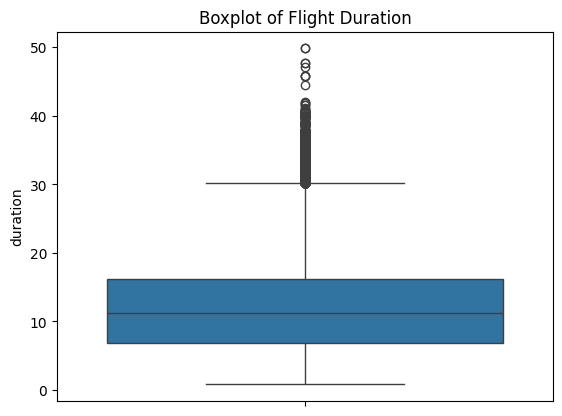

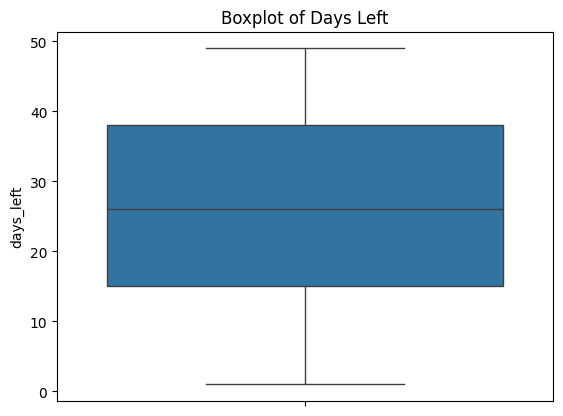

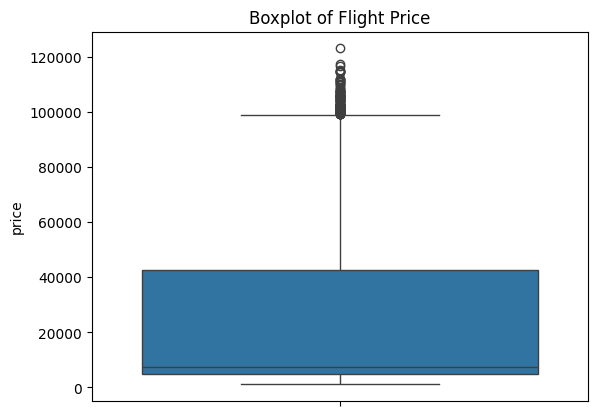

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Duration
sns.boxplot(data['duration'])
plt.title("Boxplot of Flight Duration")
plt.show()

# Days left
sns.boxplot(data['days_left'])
plt.title("Boxplot of Days Left")
plt.show()

# Price
sns.boxplot(data['price'])
plt.title("Boxplot of Flight Price")
plt.show()

### 1.14. Analyze distributions

In [94]:
categorical_columns = ['airline', 'source_city', 'destination_city', 'class', 'stops', 'departure_time', 'arrival_time']
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value counts for airline:
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


Value counts for source_city:
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64


Value counts for destination_city:
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64


Value counts for class:
class
Economy     206666
Business     93487
Name: count, dtype: int64


Value counts for stops:
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64


Value counts for departure_time:
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64


Value 

### 1.15. Check correlations (numeric columns)

In [95]:
data.corr(numeric_only=True)

,index,duration,days_left,price
index,1.000000,0.159007,0.014638,0.761177
duration,0.159007,1.000000,-0.039157,0.204222
days_left,0.014638,-0.039157,1.000000,-0.091949
price,0.761177,0.204222,-0.091949,1.000000


# 2. Data Cleaning and Preprocessing

## 2.1. Handle Missing Values
* Decide whether to drop, fill, or impute missing values in relevant columns.



In [96]:
# Identify columns with missing data and counts
data.isna().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [97]:
# There are no missing values, so this step can be skipped.

# Drop rows with missing values
data.dropna(inplace=True)

# Or fill missing values with numeric values with median
data["days_left"] = data["days_left"].fillna(data["days_left"].median())

## 2.2. Handle Duplicates

In [98]:
# Check for duplicate rows
data.duplicated().sum()

np.int64(0)

In [99]:
# In this dataset, there are no duplicates, so this step can also be skipped.
data.drop_duplicates(inplace=True)

## 2.3. Standardize Column Names
* Make column names consistent and clean for easier reference:

In [100]:
# Rename specific columns
data.rename(columns={'source_city':'Source_city', 'destination_city':'Destination_city'}, inplace=True)

In [103]:
data.columns

Index(['Index', 'Airline', 'Flight', 'Source_city', 'Departure_time', 'Stops',
       'Arrival_time', 'Destination_city', 'Class', 'Duration', 'Days_left',
       'Price'],
      dtype='object')

In [101]:
# Rename columns all at once
data.columns = [col.strip().capitalize() for col in data.columns]

In [102]:
data.columns

Index(['Index', 'Airline', 'Flight', 'Source_city', 'Departure_time', 'Stops',
       'Arrival_time', 'Destination_city', 'Class', 'Duration', 'Days_left',
       'Price'],
      dtype='object')

## 2.4. Clean Categorical Data
* Remove leading/trailing spaces and standardize text:

In [106]:
data['Flight'] = data['Flight'].str.strip().str.upper()
data['Class'] = data['Class'].str.strip().str.capitalize()

In [107]:
data.head()

,Index,Airline,Flight,Source_city,Departure_time,Stops,Arrival_time,Destination_city,Class,Duration,Days_left,Price
0,0,SPICEJET,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SPICEJET,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AIRASIA,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,VISTARA,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,VISTARA,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## 2.5. Convert Data Types
* Convert columns to appropriate types for analysis:

In [108]:
# If departure/arrival times are strings, convert to datetime
# data['Departure_time'] = pd.to_datetime(data['Departure_time'])
# data['Arrival_time'] = pd.to_datetime(data['Arrival_time'])

# Numeric columns are already correct

## 2.8. Final Check

In [109]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Index             300153 non-null  int64  
 1   Airline           300153 non-null  object 
 2   Flight            300153 non-null  object 
 3   Source_city       300153 non-null  object 
 4   Departure_time    300153 non-null  object 
 5   Stops             300153 non-null  object 
 6   Arrival_time      300153 non-null  object 
 7   Destination_city  300153 non-null  object 
 8   Class             300153 non-null  object 
 9   Duration          300153 non-null  float64
 10  Days_left         300153 non-null  int64  
 11  Price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Index,Duration,Days_left,Price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


# 3. Exploratory Data Analysis (EDA) — Define Questions and Hypotheses

## 3.1. Airline Analysis

### Questions:
  * Which airline operates the most flights?
  * Which airline has the highest average flight price?
  * Which airline has the most non-stop flights?

In [127]:
# Most flights per airline
counts_df = data["Airline"].value_counts().reset_index()
counts_df.columns = ["Airline", "FlightCount"]

# Sort by FlightCount DESC
counts_df = counts_df.sort_values(by="FlightCount", ascending=False)

print(counts_df)

# Which airline operates the most flights?
flight_row = counts_df.iloc[0]
print(flight_row)

first_airline = counts_df.iloc[0]["Airline"]
first_count = counts_df.iloc[0]["FlightCount"]
print(first_airline, first_count)

top_airline = data["Airline"].value_counts().idxmax()
top_count = data["Airline"].value_counts().max()

print(top_airline, top_count)

     Airline  FlightCount
0    VISTARA       127859
1  AIR_INDIA        80892
2     INDIGO        43120
3   GO_FIRST        23173
4    AIRASIA        16098
5   SPICEJET         9011
Airline        VISTARA
FlightCount     127859
Name: 0, dtype: object
VISTARA 127859
VISTARA 127859


# 4. Visualization / Reporting